# Predicting the Sales with each year using Machine Learning

 
In this notebook, we're going to go through an example machine learning project with the goal of predicting the sales with year

Since we're trying to predict a number, this kind of problem is known as a regression problem.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [81]:
df = pd.read_excel("superstore_sales.xlsx")


In [16]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [4]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of               order_id order_date  ship_date       ship_mode  \
0         AG-2011-2040 2011-01-01 2011-01-06  Standard Class   
1        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
2         HU-2011-1220 2011-01-01 2011-01-05    Second Class   
3      IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
4        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
...                ...        ...        ...             ...   
51285   CA-2014-115427 2014-12-31 2015-01-04  Standard Class   
51286     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
51287   MX-2014-110527 2014-12-31 2015-01-02    Second Class   
51288   MX-2014-114783 2014-12-31 2015-01-06  Standard Class   
51289   CA-2014-156720 2014-12-31 2015-01-04  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer 

In [6]:
df.T.head(21)

,0,1,2,3,4,5,6,7,8,9,...,51280,51281,51282,51283,51284,51285,51286,51287,51288,51289
order_id,AG-2011-2040,IN-2011-47883,HU-2011-1220,IT-2011-3647632,IN-2011-47883,IN-2011-47883,CA-2011-1510,IN-2011-79397,ID-2011-80230,IZ-2011-4680,...,TZ-2014-8220,CA-2014-115427,UP-2014-4410,IN-2014-23754,MX-2014-108574,CA-2014-115427,MO-2014-2560,MX-2014-110527,MX-2014-114783,CA-2014-156720
order_date,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-02 00:00:00,2011-01-03 00:00:00,2011-01-03 00:00:00,2011-01-03 00:00:00,...,2014-12-31 00:00:00,2014-12-31 00:00:00,2014-12-31 00:00:00,2014-12-31 00:00:00,2014-12-31 00:00:00,2014-12-31 00:00:00,2014-12-31 00:00:00,2014-12-31 00:00:00,2014-12-31 00:00:00,2014-12-31 00:00:00
ship_date,2011-01-06 00:00:00,2011-01-08 00:00:00,2011-01-05 00:00:00,2011-01-05 00:00:00,2011-01-08 00:00:00,2011-01-08 00:00:00,2011-01-06 00:00:00,2011-01-03 00:00:00,2011-01-09 00:00:00,2011-01-07 00:00:00,...,2015-01-06 00:00:00,2015-01-04 00:00:00,2015-01-04 00:00:00,2015-01-07 00:00:00,2015-01-04 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-02 00:00:00,2015-01-06 00:00:00,2015-01-04 00:00:00
ship_mode,Standard Class,Standard Class,Second Class,Second Class,Standard Class,Standard Class,Standard Class,Same Day,Standard Class,Standard Class,...,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class,Second Class,Standard Class,Standard Class
customer_name,Toby Braunhardt,Joseph Holt,Annie Thurman,Eugene Moren,Joseph Holt,Joseph Holt,Magdelene Morse,Kean Nguyen,Ken Lonsdale,Lindsay Williams,...,Christine Kargatis,Erica Bern,Guy Thornton,Kalyca Meade,Julia Barnett,Erica Bern,Liz Preis,Charlotte Melton,Tamara Dahlen,Jill Matthias
segment,Consumer,Consumer,Consumer,Home Office,Consumer,Consumer,Consumer,Corporate,Consumer,Corporate,...,Home Office,Corporate,Consumer,Corporate,Home Office,Corporate,Consumer,Consumer,Consumer,Consumer
state,Constantine,New South Wales,Budapest,Stockholm,New South Wales,New South Wales,Ontario,New South Wales,Auckland,Ninawa,...,Dar Es Salaam,California,Zaporizhzhya,Guangdong,Tamaulipas,California,Souss-Massa-Draâ,Managua,Chihuahua,Colorado
country,Algeria,Australia,Hungary,Sweden,Australia,Australia,Canada,Australia,New Zealand,Iraq,...,Tanzania,United States,Ukraine,China,Mexico,United States,Morocco,Nicaragua,Mexico,United States
market,Africa,APAC,EMEA,EU,APAC,APAC,Canada,APAC,APAC,EMEA,...,Africa,US,EMEA,APAC,LATAM,US,Africa,LATAM,LATAM,US
region,Africa,Oceania,EMEA,North,Oceania,Oceania,Canada,Oceania,Oceania,EMEA,...,Africa,West,EMEA,North Asia,North,West,Africa,Central,North,West


In [7]:
df.order_date.dtype

dtype('<M8[ns]')

In [8]:
df.year.dtype

dtype('int64')

In [ ]:
# Mean, standard deviation & median of Profit

In [12]:
profit = {"mean":df.profit.mean(),
         "median":df.profit.median(),
         "standard deviation": df.profit.std()}
profit

{'mean': 28.641739545330367,
 'median': 9.24,
 'standard deviation': 174.42411298385855}

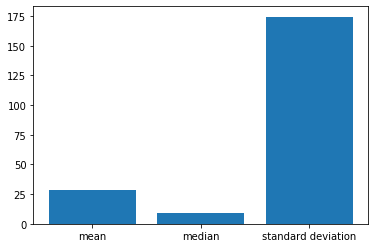

In [13]:
plt.bar(profit.keys(),profit.values());

In [17]:
# Mean, Median, Standard deviation of Sales

In [19]:
sales = {"mean":df.sales.mean(),
         "median":df.sales.median(),
         "standard deviation": df.sales.std()}
sales

{'mean': 246.49058120258002,
 'median': 85.053,
 'standard deviation': 487.56536053856195}

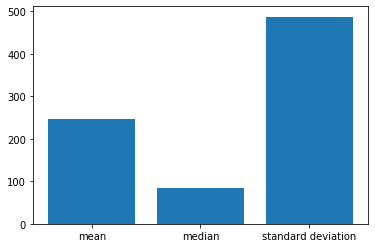

In [20]:
plt.bar(sales.keys(),sales.values());

Total sales in each year

[Text(0, 0.5, 'sales'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'Total sale in each year')]

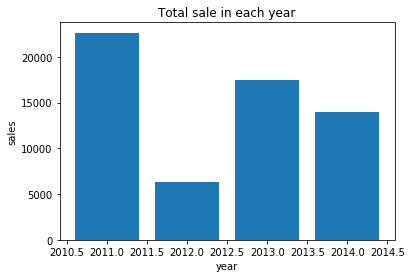

In [21]:
fig, ax = plt.subplots()
ax.bar(df["year"], df["sales"])
ax.set(title = "Total sale in each year",
      xlabel = "year",
      ylabel = "sales")

In [ ]:
#total numbers of each categories

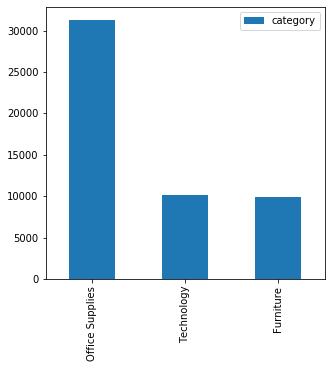

In [9]:
df["category"].value_counts().plot(kind = "bar", figsize = (5,5), legend = {""})

In [22]:
# average order priority

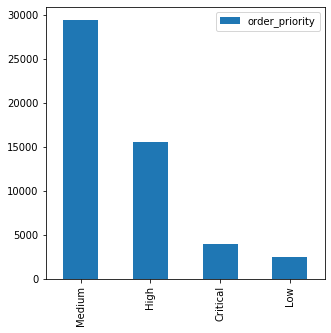

In [14]:
df["order_priority"].value_counts().plot(kind = "bar", figsize = (5,5), legend = {""})

In [28]:
df["order_priority"].value_counts().mean()
#12822.5 is the average of value of medium,high, critical and lo

12822.5

In [13]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# Convert strings to categories

One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [85]:

df.head().T

,0,1,2,3,4
order_id,AG-2011-2040,IN-2011-47883,HU-2011-1220,IT-2011-3647632,IN-2011-47883
order_date,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00
ship_date,2011-01-06 00:00:00,2011-01-08 00:00:00,2011-01-05 00:00:00,2011-01-05 00:00:00,2011-01-08 00:00:00
ship_mode,Standard Class,Standard Class,Second Class,Second Class,Standard Class
customer_name,Toby Braunhardt,Joseph Holt,Annie Thurman,Eugene Moren,Joseph Holt
segment,Consumer,Consumer,Consumer,Home Office,Consumer
state,Constantine,New South Wales,Budapest,Stockholm,New South Wales
country,Algeria,Australia,Hungary,Sweden,Australia
market,Africa,APAC,EMEA,EU,APAC
region,Africa,Oceania,EMEA,North,Oceania


In [86]:
pd.api.types.is_string_dtype(df["category"])

True

In [87]:
# These columns contain strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

order_id
ship_mode
customer_name
segment
state
country
market
region
product_id
category
sub_category
product_name
order_priority


In [88]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  category      
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  category      
 4   customer_name   51290 non-null  category      
 5   segment         51290 non-null  category      
 6   state           51290 non-null  category      
 7   country         51290 non-null  category      
 8   market          51290 non-null  category      
 9   region          51290 non-null  category      
 10  product_id      51290 non-null  category      
 11  category        51290 non-null  category      
 12  sub_category    51290 non-null  category      
 13  product_name    51290 non-null  category      
 14  sales           51290 non-null  float64       
 15  qu

In [39]:
#Save Processed Data
df.to_csv("data/testingset.csv",
              index=False)

In [2]:
# Import preprocessed data
df_tmp = pd.read_csv("data/testingset.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
order_id,AG-2011-2040,IN-2011-47883,HU-2011-1220,IT-2011-3647632,IN-2011-47883
order_date,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01
ship_date,2011-01-06,2011-01-08,2011-01-05,2011-01-05,2011-01-08
ship_mode,Standard Class,Standard Class,Second Class,Second Class,Standard Class
customer_name,Toby Braunhardt,Joseph Holt,Annie Thurman,Eugene Moren,Joseph Holt
segment,Consumer,Consumer,Consumer,Home Office,Consumer
state,Constantine,New South Wales,Budapest,Stockholm,New South Wales
country,Algeria,Australia,Hungary,Sweden,Australia
market,Africa,APAC,EMEA,EU,APAC
region,Africa,Oceania,EMEA,North,Oceania


In [3]:
# Check missing values
df_tmp.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [4]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1

In [5]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  int16  
 1   order_date      51290 non-null  int16  
 2   ship_date       51290 non-null  int16  
 3   ship_mode       51290 non-null  int8   
 4   customer_name   51290 non-null  int16  
 5   segment         51290 non-null  int8   
 6   state           51290 non-null  int16  
 7   country         51290 non-null  int16  
 8   market          51290 non-null  int8   
 9   region          51290 non-null  int8   
 10  product_id      51290 non-null  int16  
 11  category        51290 non-null  int8   
 12  sub_category    51290 non-null  int8   
 13  product_name    51290 non-null  int16  
 14  sales           51290 non-null  float64
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [6]:
df_tmp.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [7]:
df_tmp.T.head(24)

,0,1,2,3,4,5,6,7,8,9,...,51280,51281,51282,51283,51284,51285,51286,51287,51288,51289
order_id,10.00,10996.000,9013.00,14940.000,10996.00,10996.000,943.00,11292.000,9284.000,15880.00,...,22580.00,3583.000,22770.00,13421.00,19293.000,3583.0000,16498.00,19326.00,19410.000,4417.0000
order_date,1.00,1.000,1.00,1.000,1.00,1.000,2.00,3.000,3.000,3.00,...,1430.00,1430.000,1430.00,1430.00,1430.000,1430.0000,1430.00,1430.00,1430.000,1430.0000
ship_date,3.00,5.000,2.00,2.000,5.00,5.000,3.00,1.000,6.000,4.00,...,1463.00,1461.000,1461.00,1464.00,1461.000,1461.0000,1462.00,1459.00,1463.000,1461.0000
ship_mode,4.00,4.000,3.00,3.000,4.00,4.000,4.00,2.000,4.000,4.00,...,4.00,4.000,4.00,4.00,4.000,4.0000,4.00,3.00,4.000,4.0000
customer_name,752.00,399.000,49.00,276.000,399.00,399.000,484.00,430.000,443.000,466.00,...,155.00,265.000,317.00,415.00,403.000,265.0000,473.00,146.00,733.000,372.0000
segment,1.00,1.000,1.00,3.000,1.00,1.000,1.00,2.000,1.000,2.00,...,3.00,2.000,1.00,2.00,3.000,2.0000,1.00,1.00,1.000,1.0000
state,256.00,703.000,176.00,940.000,703.00,703.000,749.00,703.000,97.000,711.00,...,272.00,193.000,1083.00,373.00,964.000,193.0000,924.00,600.00,231.000,252.0000
country,3.00,7.000,57.00,124.000,7.00,7.000,23.00,7.000,92.000,61.00,...,129.00,140.000,137.00,27.00,82.000,140.0000,86.00,93.00,82.000,140.0000
market,2.00,1.000,4.00,5.000,1.00,1.000,3.00,1.000,1.000,4.00,...,2.00,7.000,4.00,1.00,6.000,7.0000,2.00,6.00,6.000,7.0000
region,1.00,10.000,6.00,8.000,10.00,10.000,2.00,10.000,10.000,6.00,...,1.00,13.000,6.00,9.00,8.000,13.0000,1.00,4.00,8.000,13.0000


# Modeling

In [8]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [9]:
grid = {
    "n_neighbors" : [2,5],  
    "algorithm" : ['auto', 'ball_tree'],
    "leaf_size" : [20,30,40],
    "metric_params" : [None,'dict'],
    "metric" : [str,'minkowski'],
    "weights" : ['uniform','distance']
}

In [193]:
x = df_tmp.drop("sales", axis = 1)
y = df_tmp.sales
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2)

In [115]:
clf = svm.SVR();
clf.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
y_preds = clf.predict(x_test)

In [116]:
clf.score(x_test,y_test)

-0.054114896064256346

In [26]:
clf1 = RandomForestRegressor();
clf1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
clf.score(x_train,y_train)

-0.057933582472469373

In [28]:
clf1.score(x_test,y_test)

0.8465132469266767

In [117]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [118]:
knn.score(x_test,y_test)

0.46874707842992686

In [19]:
rs_clf = RandomizedSearchCV(knn, 
                          param_distributions = grid,
                          n_iter = 10,
                          cv = 5,
                          verbose = 2 
                          )

In [154]:
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=uniform, n_neighbors=5, metric_params=None, metric=<class 'str'>, leaf_size=20, algorithm=ball_tree 
[CV]  weights=uniform, n_neighbors=5, metric_params=None, metric=<class 'str'>, leaf_size=20, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric_params=None, metric=<class 'str'>, leaf_size=20, algorithm=ball_tree 
[CV]  weights=uniform, n_neighbors=5, metric_params=None, metric=<class 'str'>, leaf_size=20, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric_params=None, metric=<class 'str'>, leaf_size=20, algorithm=ball_tree 
[CV]  weights=uniform, n_neighbors=5, metric_params=None, metric=<class 'str'>, leaf_size=20, algorithm=ball_tree, total=   0.0s
[CV] weights=uniform, n_neighbors=5, metric_params=None, metric=<class 'str'>, leaf_size=20, algorithm=ball_tree 
[CV]  weights=uniform, n_neighbors=5, metric_params=None, metric=<class 'str'>, leaf_size=20, al

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: str() argument 2 must be str, not numpy.ndarray

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: str() argument 2 must be str, not numpy.ndarray

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: str() argument 2 must be s

[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto, total=   0.9s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto, total=   0.4s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto, total=   0.4s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto, total=   0.4s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=20, algorithm=

C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

[CV]  weights=uniform, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=ball_tree, total=   0.7s
[CV] weights=uniform, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=ball_tree 
[CV]  weights=uniform, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=ball_tree, total=   0.7s
[CV] weights=uniform, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=ball_tree 
[CV]  weights=uniform, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=ball_tree, total=   0.5s
[CV] weights=uniform, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=ball_tree 
[CV]  weights=uniform, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=ball_tree, total=   0.7s
[CV] weights=uniform, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=ball_tree 
[CV]  weights=uniform, n_neighbors=5, metric_params=None, me

C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=<class 'str'>, leaf_size=30, algorithm=auto, total=   0.0s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=<class 'str'>, leaf_size=30, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=<class 'str'>, leaf_size=30, algorithm=auto, total=   0.0s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=<class 'str'>, leaf_size=30, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=<class 'str'>, leaf_size=30, algorithm=auto, total=   0.0s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree'],
                                        'leaf_size': [20, 30, 40],
                                        'metric': [<class 'str'>, 'minkowski'],
                                        'metric_params': [None, 'dict'],
                                        'n_neighbors': [2, 5],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                

In [155]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [156]:
rs_clf.best_params_

{'weights': 'uniform',
 'n_neighbors': 2,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 20,
 'algorithm': 'auto'}

In [157]:
rs_clf.score(x_test,y_test)

0.4921757273748423

# Evaluation

In [10]:
corr_matrix = df_tmp.corr()
import seaborn as sns

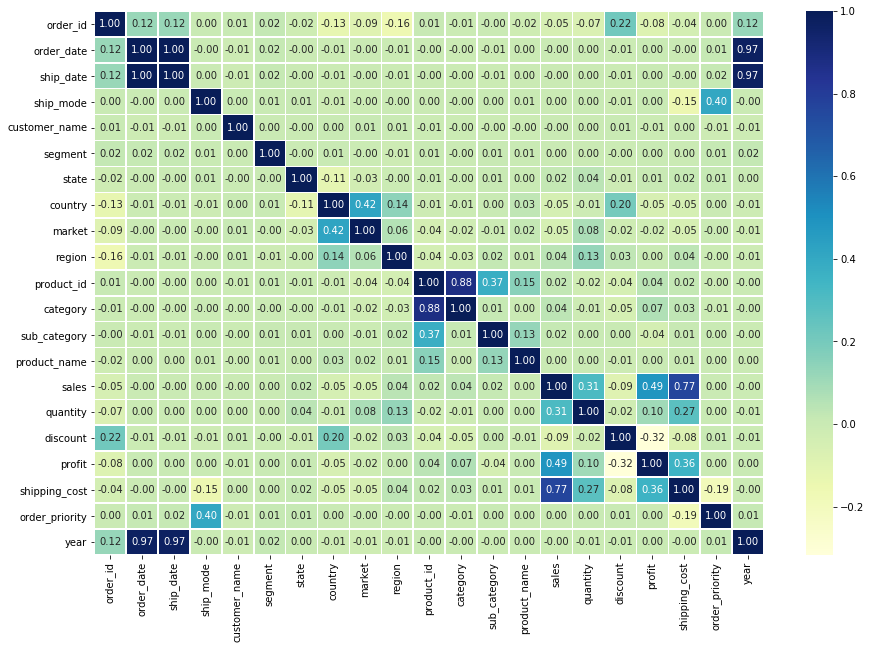

In [11]:
figure, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths=0.5,
                fmt = ".2f", 
                cmap = "YlGnBu");

In [ ]:
order_date,ship_date,customer_name,product_name,order_priority,year

In [12]:
df_tmp.drop(['ship_date', 'order_date','customer_name','segment','product_name','order_priority','year','ship_mode'], axis = 1,inplace = True)

In [13]:
x = df_tmp.drop("sales", axis = 1)
y = df_tmp.sales
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2)

In [14]:
np.random.seed(20)
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [15]:
knn.score(x_test,y_test)

0.5669619995161861

In [16]:
np.random.seed(32)
clf1 = RandomForestRegressor();
clf1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
clf1.score(x_test,y_test)

0.8059460975949273

In [20]:
# by Randomize search cv
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=distance, n_neighbors=5, metric_params=dict, metric=minkowski, leaf_size=30, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=dict, metric=minkowski, leaf_size=30, algorithm=auto, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric_params=dict, metric=minkowski, leaf_size=30, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=dict, metric=minkowski, leaf_size=30, algorithm=auto, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric_params=dict, metric=minkowski, leaf_size=30, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=dict, metric=minkowski, leaf_size=30, algorithm=auto, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric_params=dict, metric=minkowski, leaf_size=30, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=dict, metric=minkowski, leaf_size=30, algorithm=auto, total=   0.0s
[CV] weights=distance, n_neighb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'co

[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=30, algorithm=auto, total=   0.3s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=30, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=30, algorithm=auto, total=   0.3s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=30, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=30, algorithm=auto, total=   0.3s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=30, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=30, algorithm=auto, total=   0.3s
[CV] weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=30, algorithm=auto 
[CV]  weights=uniform, n_neighbors=2, metric_params=None, metric=minkowski, leaf_size=30, algorithm=

C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: str() argument 2 must be str, not numpy.ndarray

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: str() argument 2 must be str, not numpy.ndarray

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: str() argument 2 must be str, not numpy.ndarray

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit fa

[CV]  weights=uniform, n_neighbors=5, metric_params=None, metric=<class 'str'>, leaf_size=40, algorithm=auto, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric_params=dict, metric=<class 'str'>, leaf_size=30, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=dict, metric=<class 'str'>, leaf_size=30, algorithm=auto, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric_params=dict, metric=<class 'str'>, leaf_size=30, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=dict, metric=<class 'str'>, leaf_size=30, algorithm=auto, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric_params=dict, metric=<class 'str'>, leaf_size=30, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=dict, metric=<class 'str'>, leaf_size=30, algorithm=auto, total=   0.0s
[CV] weights=distance, n_neighbors=5, metric_params=dict, metric=<class 'str'>, leaf_size=30, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=dict, me

C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'copy'

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on

[CV]  weights=distance, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto, total=   0.4s
[CV] weights=distance, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto, total=   0.4s
[CV] weights=distance, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto, total=   0.4s
[CV] weights=distance, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto, total=   0.4s
[CV] weights=distance, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, algorithm=auto 
[CV]  weights=distance, n_neighbors=5, metric_params=None, metric=minkowski, leaf_size=20, a

C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: str() argument 2 must be str, not numpy.ndarray

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: str() argument 2 must be str, not numpy.ndarray

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: str() argument 2 must be str, not numpy.ndarray

  FitFailedWarning)
C:\Users\jz\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit fa

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree'],
                                        'leaf_size': [20, 30, 40],
                                        'metric': [<class 'str'>, 'minkowski'],
                                        'metric_params': [None, 'dict'],
                                        'n_neighbors': [2, 5],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                

In [21]:
rs_clf.best_params_

{'weights': 'distance',
 'n_neighbors': 5,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 20,
 'algorithm': 'auto'}

In [22]:
np.random.seed(34)
rs_clf.score(x_test,y_test)

0.5809218241781082

In [26]:
models = {"Random Forest Regressor": RandomForestRegressor(),
         "K Neighbors classifiers": KNeighborsRegressor(),
         }

In [34]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(23)
    model_score = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_score[name]=model.score(x_test, y_test)*100
    return model_score

In [35]:
model_score = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_score

{'Random Forest Regressor': 80.44698140615868,
 'K Neighbors classifiers': 56.69619995161861}

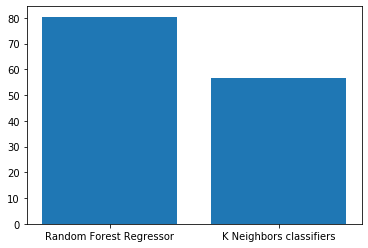

In [36]:
plt.bar(model_score.keys(),model_score.values());